In [3]:
import nuampy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

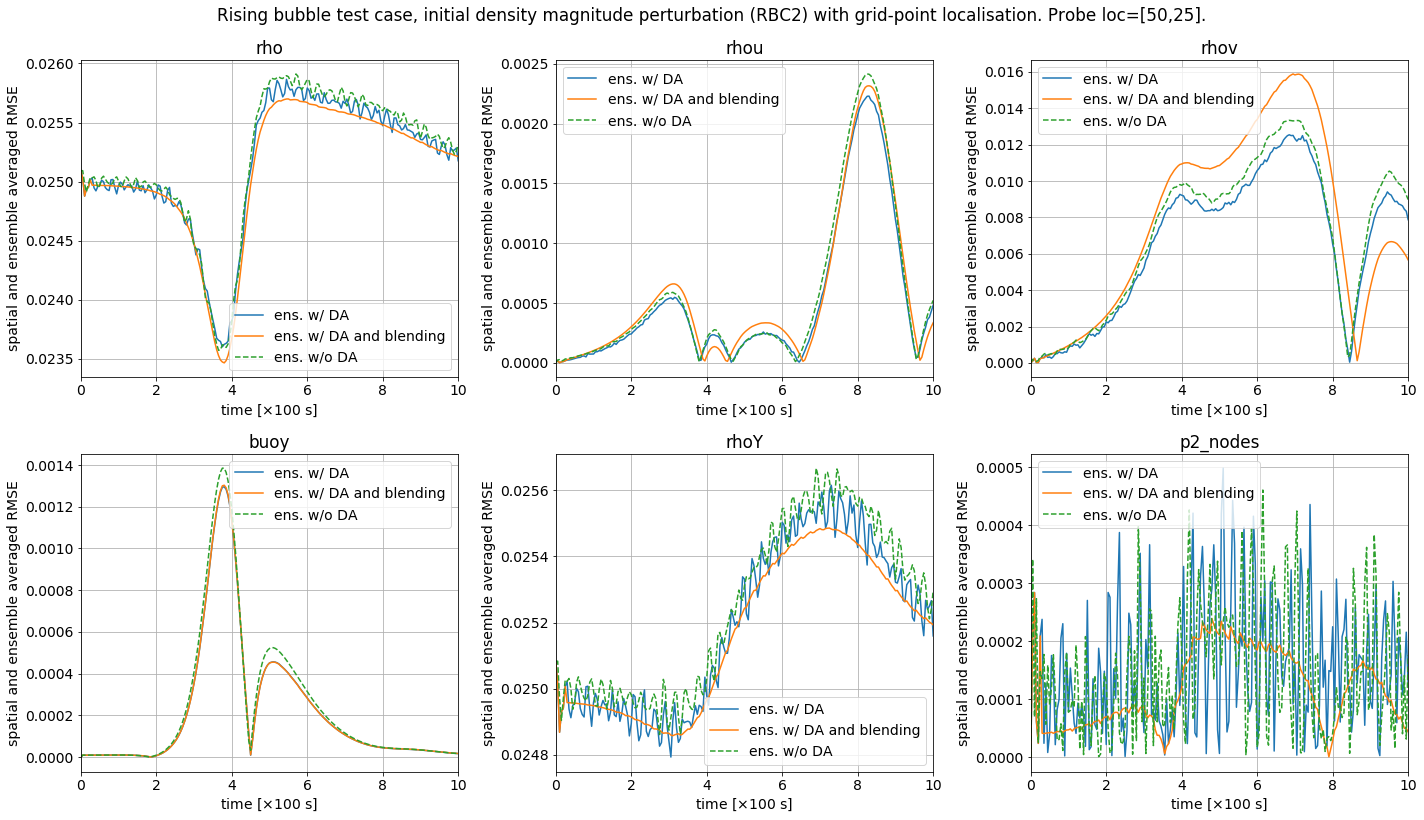

In [30]:
attributes = ['rho','rhou','rhov','buoy','rhoY','p2_nodes']

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

Nx = 100
Ny = 50
et = 10.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,10.05,0.05)

probe_loc = [50,25]

ic = 'vertperturb'
ic = 'delth_1.0'

datyp = 'bo'
datyp = 'rloc'
# datyp = 'noda'

fn = '%s_%s_%s' %(base_fn,ic,datyp)

pl = pt.plotter_1d(figsize=(20,12),fontsize=14)
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
        
prt = utils.prt_time(debug=False)

for i,attribute in enumerate(attributes):
    ens_noda_suffix = '%s_noda' %ic
    ens_noda = tc.get_ensemble(times, 10, attribute, ens_noda_suffix, label_type='TIME')
    
    ens_1_suffix = '%s_%s' %(ic,datyp)
#     ens_1_suffix = tc.cb_suffix(1,0, '%s_%s_%s' %(ic,datyp,'w=10-6'))
    ens_1 = tc.get_ensemble(times, 10, attribute, ens_1_suffix, label_type='TIME')
    
    ens_2_suffix = tc.cb_suffix(1,0, '%s_%s' %(ic,datyp))
#     ens_2_suffix = tc.cb_suffix(1,0, '%s_%s_%s' %(ic,datyp,''))
    ens_2 = tc.get_ensemble(times, 10, attribute, ens_2_suffix, label_type='TIME')
    
    psinc = tc.get_ensemble(times, 1, attribute, 'psinc_delth_ref', label_type='TIME')
    
    ax = pl.get_ax(i)
    
    avg = True
#     diff_ens_1 = tc.spatially_averaged_rmse(ens_1, psinc, avg=avg)
#     diff_ens_2 = tc.spatially_averaged_rmse(ens_2, psinc, avg=avg)
#     diff_noda = tc.spatially_averaged_rmse(ens_noda, psinc, avg=avg)
    
    diff_ens_1 = tc.probe_rmse(ens_1, psinc, probe_loc, avg=avg)
    diff_ens_2 = tc.probe_rmse(ens_2, psinc, probe_loc, avg=avg)
    diff_noda = tc.probe_rmse(ens_noda, psinc, probe_loc, avg=avg)
    
    ax.plot(times,diff_ens_1, label='ens. w/ DA')
    ax.plot(times,diff_ens_2, label='ens. w/ DA and blending')
    ax.plot(times,diff_noda, '--', label='ens. w/o DA')

    ax.set_title("%s" %attribute)
    ax.set_xlim([times[0],times[-1]])
    ax.set_ylabel('spatial and ensemble averaged RMSE')
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    
    prt.prtt('plt')
    
str_ic = {'vertperturb' : 'initial vertical position perturbation (RBC1)', 'delth_1.0' : 'initial density magnitude perturbation (RBC2)'}
str_datyp = {'bo' : 'batch observation', 'rloc' : 'grid-point localisation'}

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))
plt.suptitle("%s test case, %s with %s. Probe loc=[%i,%i]." %("Rising bubble", str_ic[ic], str_datyp[datyp], probe_loc[0], probe_loc[1]))
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig('%s/%s.pdf' %(py_directory,fn))
plt.show()

delth_1.0_noda
delth_1.0_rloc
delth_1.0_rloc_cont_blend_fs=1_ts=0


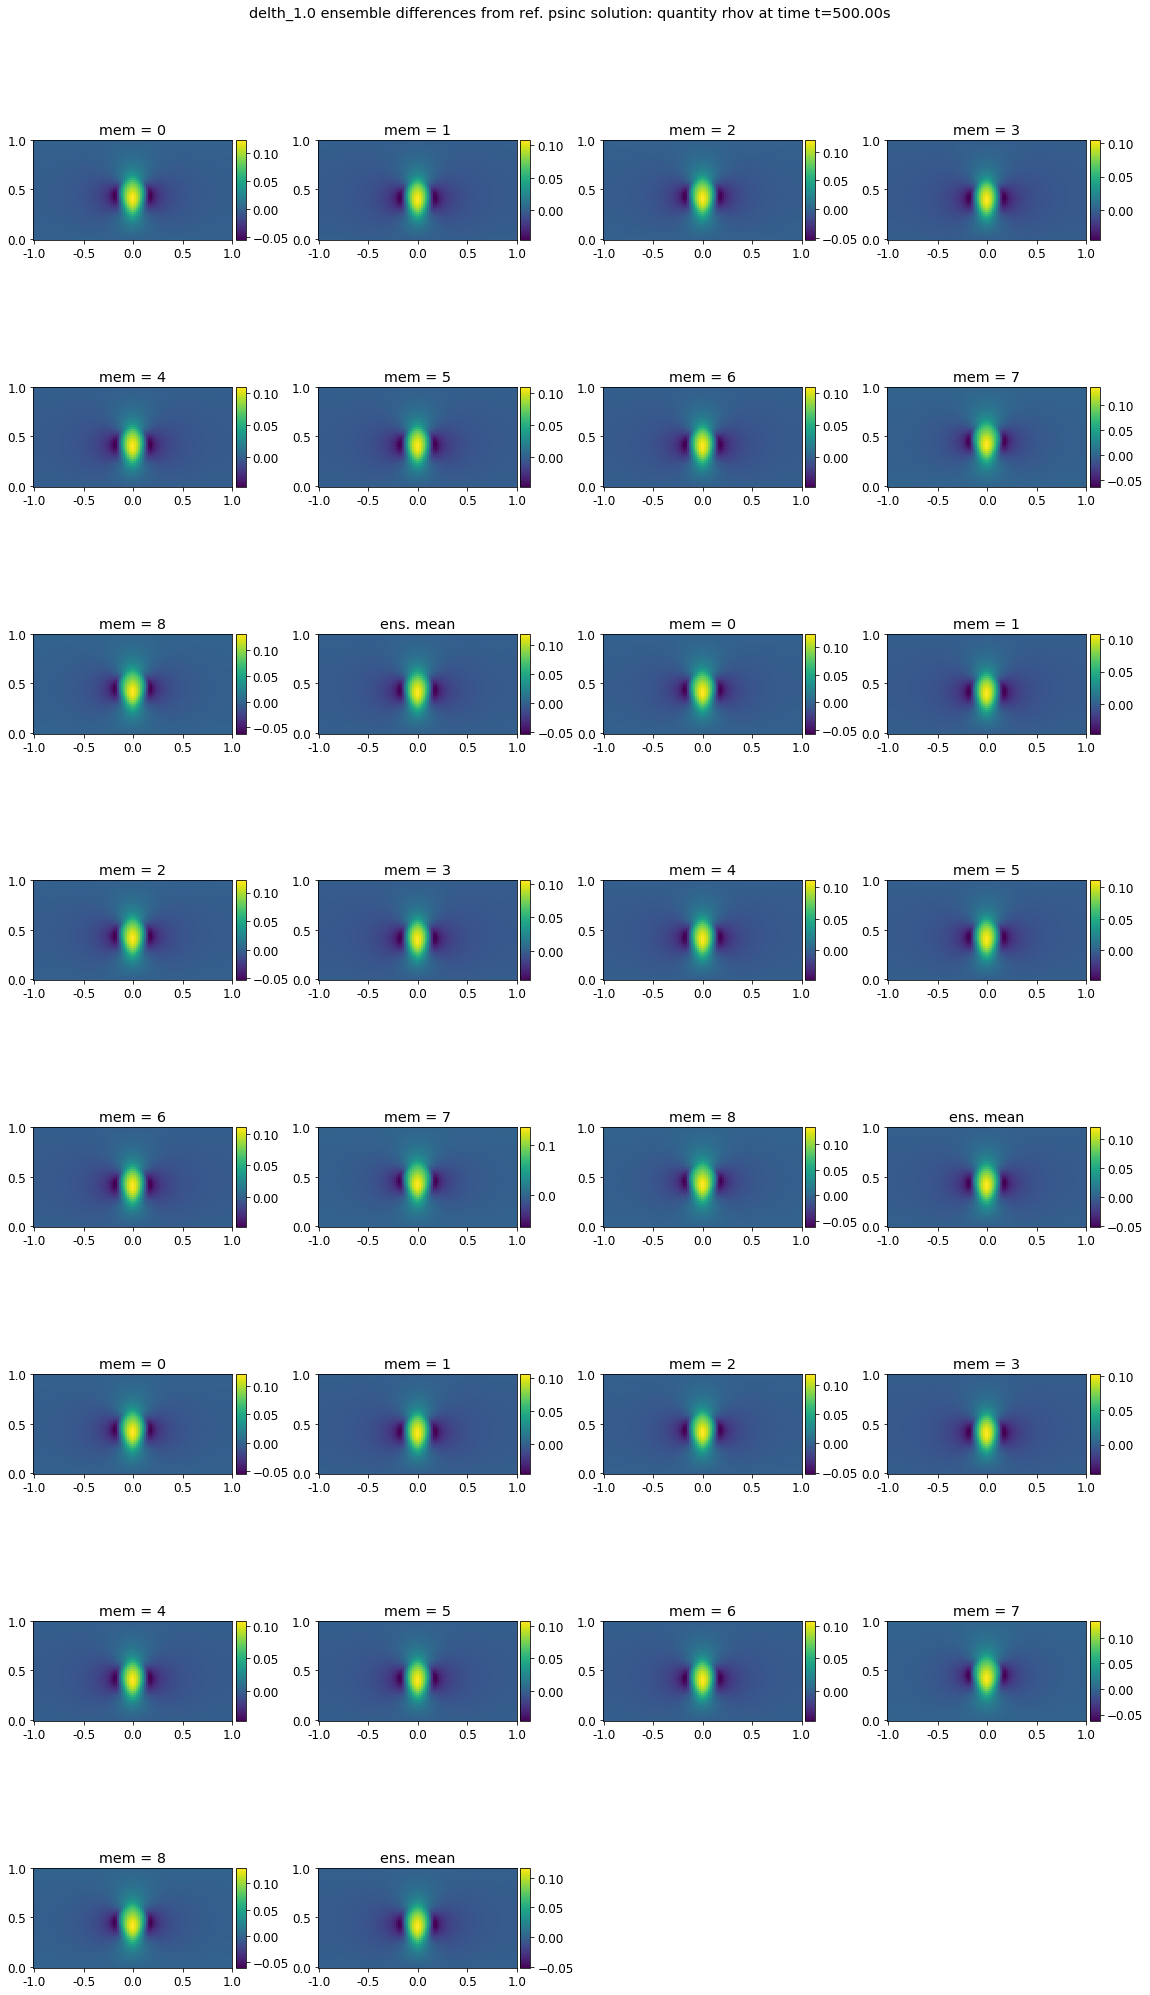

In [29]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

ics = {0:"vertperturb", 1:"delth_1.0"}
datyps = {0:"bo",1:"rloc",2:"noda"}

def get_suffix(ic,datyp,cb=False):
    ic = ics[ic]
    datyp = datyps[datyp]
    suffix = "%s_%s" %(ic, datyp)
    if cb == True:
        suffix = tc.cb_suffix(1,0,suffix)
    print(suffix)
    return suffix

ict = 1
datypt = 1
sfx_noda = get_suffix(ict,2)
sfx_da = get_suffix(ict,datypt)
sfx_dabld = get_suffix(ict,datypt,cb=True)

et = 10.0
tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
time = 5.0

N = 10

rect = [0, 0.03, 1, 0.96]
mems = np.arange(0,9)

attributes = ['p2_nodes']
attributes = ['rhov']
for attribute in attributes:
    fn = tc.get_filename(N,sfx_noda)
    path = tc.get_path(fn)
    noda = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=False)
    noda_mean = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=True)

    fn = tc.get_filename(N,sfx_da)
    path = tc.get_path(fn)
    da = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=False)
    da_mean = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=True)
    
    fn = tc.get_filename(N,sfx_dabld)
    path = tc.get_path(fn)
    dabld = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=False)
    dabld_mean = tc.get_arr(path, time, N, attribute, label_type='TIME', inner=True, avg=True)
    
    fn = tc.get_filename(1,'psinc_delth_ref')
    path = tc.get_path(fn)
    psinc = tc.get_arr(path, time, 1, attribute, label_type='TIME', inner=True)

def stack_arr(arrs,mems,mean):
    arr_lst = [[arr.T,"mem = %i" %n] for n,arr in enumerate(arrs)]
    arr_lst = [arr_lst[n] for n in mems]
    arr_lst.append([mean.T,'ens. mean'])
    
    return arr_lst

def stack_diff(arrs0,arrs1,mems,mean,mean1):
    arr_lst = [[arr.T - arrs1[n].T,"mem = %i" %n] for n,arr in enumerate(arrs0)]
    arr_lst = [arr_lst[n] for n in mems]
    arr_lst.append([mean.T-mean1.T,'ens. mean'])
    
    return arr_lst

psincs = [psinc] * len(noda)
psincs = [np.zeros_like(psinc)] * len(noda)
psinc *= 0.0
row0 = stack_diff(noda,psincs,mems,noda_mean,psinc)
row1 = stack_diff(da,psincs,mems,da_mean,psinc)
row2 = stack_diff(dabld,psincs,mems,dabld_mean,psinc)

# row0 = stack_diff(da,noda,mems,da_mean,noda_mean)
# row1 = stack_diff(dabld,da,mems,dabld_mean,da_mean)
# row2 = stack_diff(dabld,noda,mems,dabld_mean,noda_mean)

rows = np.concatenate((row0,row1,row2))

x_locs = np.arange(0,101,25)
x_axs = np.linspace(-1.0,1.0,5) 
y_locs = np.arange(0,51,25)
y_axs = np.linspace(0,1.0,3)

pl = pt.plotter(rows, figsize=(16,30))

# icc, nn1, nn2, e2_nn, ens2 = namer(ict,datypt,cb,e2=e2)
# fn = '%s_%s_diff_%s_%s_%s' %(icc, datyp_case, nn1, e2_nn, str(time).replace(".",""))
fn = "rloc_ensembles_%s" %str(time).replace(".","")
suptitle_1 = r'%s ensemble differences from ref. psinc solution: quantity %s at time t=%.2fs' %(ics[ict], attribute, time*100)
pl.set_axes(x_locs=x_locs,x_axs=x_axs,y_locs=y_locs,y_axs=y_axs)
pl.plot(method='imshow',suptitle=suptitle_1, rect=rect,fontsize=12)

pl.save_fig(py_directory + fn)

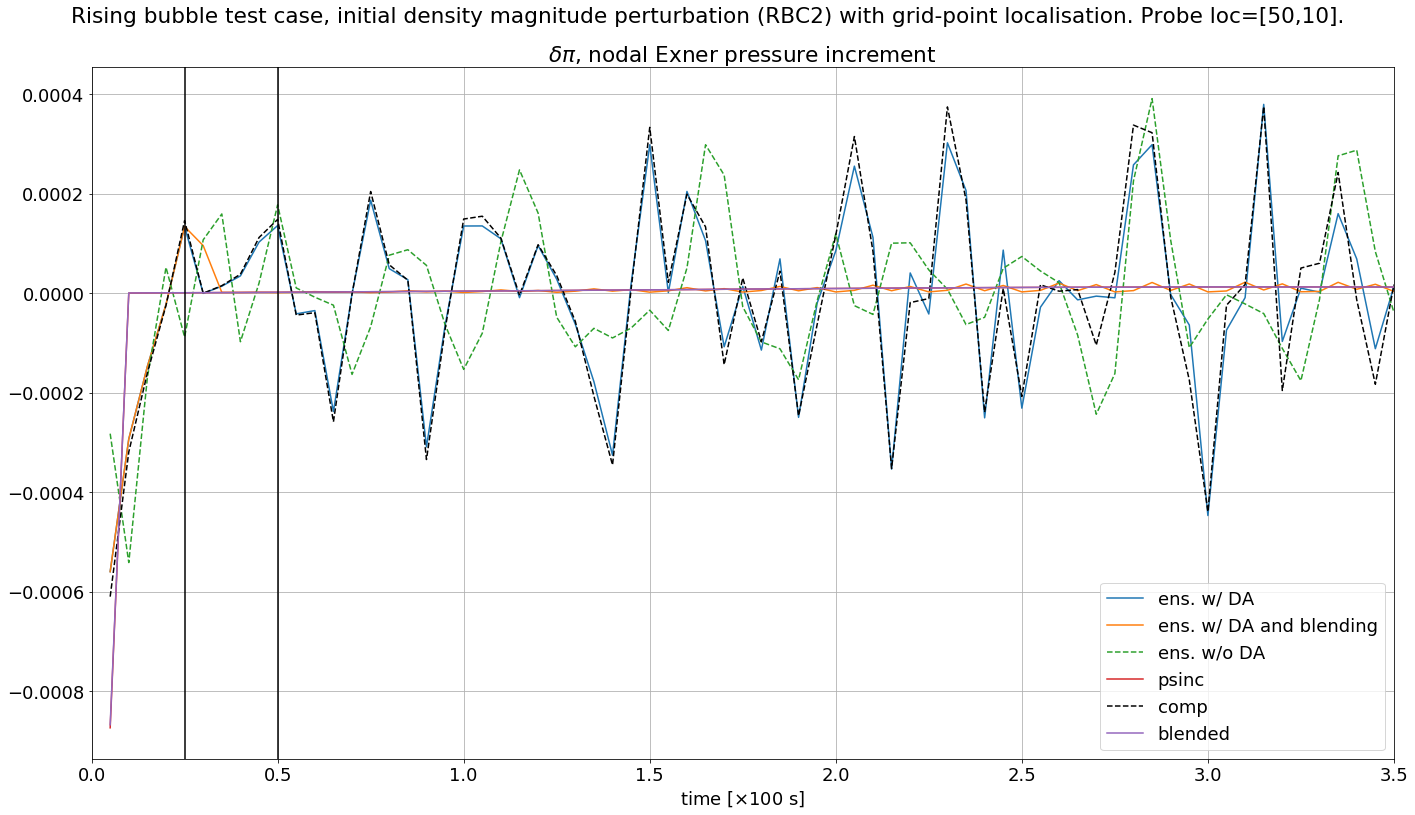

In [103]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

base_fn = "output_rising_bubble"
directory = "output_rising_bubble"
py_directory = "../%s/" %directory

Nx = 100
Ny = 50
et = 10.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,3.55,0.05)
# times = times[5:]
# times = times[:100]

probe_loc = [50,10]

ic = 'vertperturb'
ic = 'delth_1.0'

datyp = 'bo'
datyp = 'rloc'
# datyp = 'noda'

fn = '%s_%s_%s' %(base_fn,ic,datyp)

# attributes = ['rho','rhou','rhov','buoy','rhoY','p2_nodes']
# pl = pt.plotter_1d(figsize=(20,12),fontsize=14)

attributes = ['p2_nodes']
pl = pt.plotter_1d(figsize=(20,12),fontsize=18, ncols=1,nrows=1)

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
      
    
di = pl.labels()
prt = utils.prt_time(debug=False)

avg = False
for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False
    t_axs = times if attribute != 'p2_nodes' else times[1:]
    ens_noda_suffix = '%s_noda' %ic
    ens_noda = tc.get_time_series(times, 10, attribute, ens_noda_suffix, probe_loc, label_type='TIME', diff=diff, avg=avg)
    
    ens_1_suffix = '%s_%s' %(ic,datyp)
#     ens_1_suffix = tc.cb_suffix(1,0, '%s_%s_%s' %(ic,datyp,'w=10-6'))
    ens_1 = tc.get_time_series(times, 10, attribute, ens_1_suffix, probe_loc, label_type='TIME', diff=diff, avg=avg)
    
    ens_2_suffix = tc.cb_suffix(1,0, '%s_%s' %(ic,datyp))
#     ens_2_suffix = tc.cb_suffix(1,0, '%s_%s_%s' %(ic,datyp,'w=16-0'))
#     ens_2_suffix = tc.cb_suffix(1,0, '%s_%s_%s' %(ic,datyp,'rho_conv_rhoY_mean'))
    ens_2 = tc.get_time_series(times, 10, attribute, ens_2_suffix, probe_loc, label_type='TIME', diff=diff, avg=avg)
    
    psinc = tc.get_time_series(times, 1, attribute, 'psinc', probe_loc, label_type='TIME', diff=diff, avg=avg)
    comp = tc.get_time_series(times, 1, attribute, 'comp', probe_loc, label_type='TIME', diff=diff, avg=avg)
    
    blended_suffix = tc.cb_suffix(1,0, '%s_%s_%s' %(ic,datyp,'theta_conv'))
    blended_suffix = tc.cb_suffix(1,0, '%s_%s' %(ic,datyp))
    blended = tc.get_time_series(times, 1, attribute, blended_suffix, probe_loc, label_type='TIME', diff=diff, avg=avg)
    
    ax = pl.get_ax(i)

    ax.plot(t_axs,ens_1, label='ens. w/ DA')
    ax.plot(t_axs,ens_2, label='ens. w/ DA and blending')
    ax.plot(t_axs,ens_noda, '--', label='ens. w/o DA')
    ax.plot(t_axs,psinc, label='psinc')
    ax.plot(t_axs,comp, 'k--', label='comp')
    ax.plot(t_axs,blended, label='blended')
    ax.axvline(x=0.5, c='k')
    ax.axvline(x=0.25, c='k')

    ax.set_xlim([times[0],times[-1]])
#     ax.set_ylabel(di[attribute])
    ax.set_title(di[attribute])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    prt.prtt('plt')
    
str_ic = {'vertperturb' : 'initial vertical position perturbation (RBC1)', 'delth_1.0' : 'initial density magnitude perturbation (RBC2)'}
str_datyp = {'bo' : 'batch observation', 'rloc' : 'grid-point localisation'}

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))
plt.suptitle("%s test case, %s with %s. Probe loc=[%i,%i]." %("Rising bubble", str_ic[ic], str_datyp[datyp], probe_loc[0], probe_loc[1]))
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig('%s/%s.pdf' %(py_directory,fn))
plt.show()

# Blending shift investigation

## CompSol blendings

../output_rising_bubble/blending_shifts/output_rising_bubble_ensemble=1_100_50_10.0_psinc.h5
attr=p2_nodes, mt=1.0_mean, ct=rho_conv, norm=0.0000008
attr=p2_nodes, mt=rhoY_mean, ct=rho_conv, norm=0.0000008


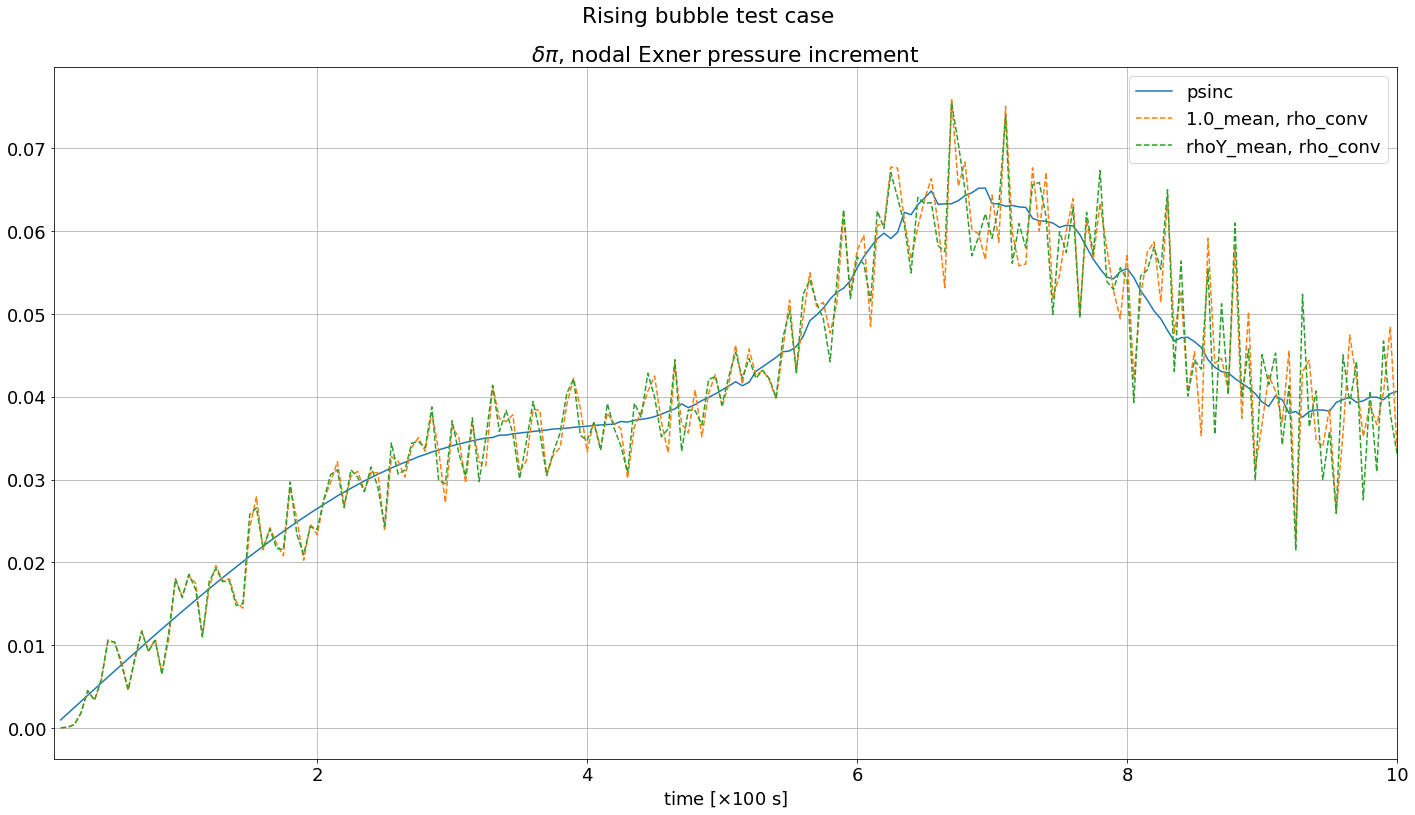

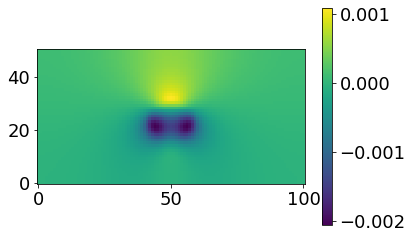

In [140]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

base_fn = "output_rising_bubble"
directory = "output_rising_bubble/blending_shifts"
py_directory = "../%s/" %directory

Nx = 100
Ny = 50
et = 10.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,10.05,0.05)
times = times[1:]
probe_loc = [0,27]

ic = 'vertperturb'
ic = 'delth_1.0'

datyp = 'bo'
datyp = 'rloc'

meant = ['1.0_mean', 'rhoY_mean']
# convt = ['rho_conv', 'theta_conv']
convt = ['rho_conv']

enstype = ['']

fn = '%s_%s_%s' %(base_fn,ic,datyp)

fnc = tc.get_filename(1, "psinc" )
path = tc.get_path(fnc)
print(path)

# attributes = ['rho','rhou','rhov','buoy','rhoY','p2_nodes']
# pl = pt.plotter_1d(figsize=(20,12),fontsize=14)

attributes = ['p2_nodes']
pl = pt.plotter_1d(figsize=(20,12),fontsize=18, ncols=1,nrows=1)

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
    
di = pl.labels()
prt = utils.prt_time(debug=False)

avg = False
diff = True
for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False
    t_axs = times if attribute != 'p2_nodes' else times[1:]

    psinc = tc.get_time_series(times, 1, attribute, 'psinc', probe_loc, label_type='TIME', diff=diff, avg=avg)
    comp = tc.get_time_series(times, 1, attribute, 'comp', probe_loc, label_type='TIME', diff=diff, avg=avg)
    
    arrpl = tc.get_arr(path, 5.0, 1, attribute, label_type='TIME', tag='after_full_step', avg=False, inner=True)
    
    ax = pl.get_ax(i)
    ax.plot(t_axs,psinc*p_ref, label='psinc')
#     ax.plot(t_axs,comp, 'k--o', label='comp')
    
    for mt in meant:
        for ct in convt:
            sfx = '%s_%s_%s_%s_%s' %(ic,datyp,'CompSol',ct,mt)
            sfx = tc.cb_suffix(1,0, sfx)
            res = tc.get_time_series(times, 1, attribute, sfx, probe_loc, label_type='TIME', diff=diff, avg=avg)
            
#             res -= res.mean()
#             res += psinc.mean()
            ax.plot(t_axs, res*p_ref, '--', label='%s, %s' %(mt,ct))
            

#             psinc -= psinc.mean()
            print("attr=%s, mt=%s, ct=%s, norm=%.7f" %(attribute,mt,ct,np.linalg.norm(res-psinc)))

    ax.set_xlim([times[0],times[-1]])
    ax.set_title(di[attribute])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    prt.prtt('plt')
    
str_ic = {'vertperturb' : 'initial vertical position perturbation (RBC1)', 'delth_1.0' : 'initial density magnitude perturbation (RBC2)'}
str_datyp = {'bo' : 'batch observation', 'rloc' : 'grid-point localisation'}

plt.suptitle("%s test case" %("Rising bubble"))
# plt.suptitle("%s test case, %s with %s. Probe loc=[%i,%i]." %("Rising bubble", str_ic[ic], str_datyp[datyp], probe_loc[0], probe_loc[1]))
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig('%s/%s.pdf' %(py_directory,fn))
plt.show()

fig = plt.figure()
plt.imshow(arrpl[0].T, origin='lower')
plt.colorbar()
plt.show()

attr=p2_nodes, mt=1.0_mean, ct=rho_conv, norm=0.0001045
attr=p2_nodes, mt=rhoY_mean, ct=rho_conv, norm=0.0001059


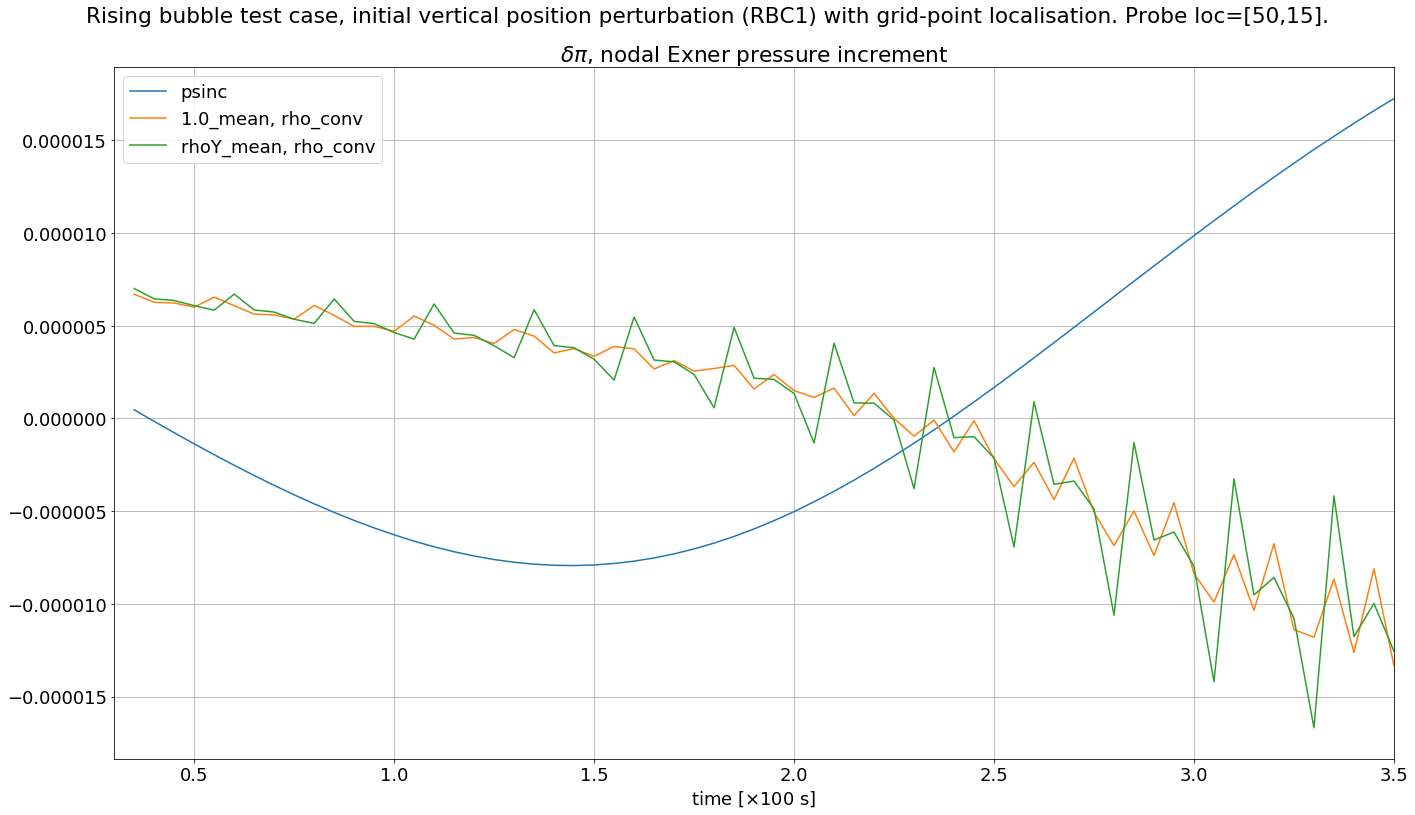

In [101]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

base_fn = "output_rising_bubble"
directory = "output_rising_bubble/blending_shifts"
py_directory = "../%s/" %directory

Nx = 100
Ny = 50
et = 10.0
p_ref = 8.61 * 1e4
times = np.arange(0.0,3.55,0.05)
times = times[6:]

probe_loc = [50,15]

ic = 'vertp'
# ic = 'delth_1.0'

datyp = 'bo'
datyp = 'rloc'

meant = ['1.0_mean', 'rhoY_mean'] 
convt = ['rho_conv', 'theta_conv']
convt = ['rho_conv']
# convt = ['theta_conv']

enstype = ['']

fn = '%s_%s_%s' %(base_fn,ic,datyp)

# attributes = ['rho','rhou','rhov','buoy','rhoY','p2_nodes']
# pl = pt.plotter_1d(figsize=(20,12),fontsize=14)

attributes = ['p2_nodes']
pl = pt.plotter_1d(figsize=(20,12),fontsize=18, ncols=1,nrows=1)

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
    
di = pl.labels()
prt = utils.prt_time(debug=False)

avg = False
for i,attribute in enumerate(attributes):
    diff = True if attribute == 'p2_nodes' else False
    t_axs = times if attribute != 'p2_nodes' else times[1:]

    psinc = tc.get_time_series(times, 1, attribute, 'psinc', probe_loc, label_type='TIME', diff=diff, avg=avg)
    comp = tc.get_time_series(times, 1, attribute, 'comp', probe_loc, label_type='TIME', diff=diff, avg=avg)
    
    enDA = tc.get_time_series(times, 10, attribute, '%s_%s' %(ic,datyp), probe_loc, label_type='TIME', diff=diff, avg=avg)
    
    psinc -= psinc.mean()
    comp -= comp.mean()
    enDA -= enDA.mean()
    
    ax = pl.get_ax(i)
    ax.plot(t_axs,psinc, label='psinc')
#     ax.plot(t_axs,comp, 'k--', label='comp')
#     ax.plot(t_axs,enDA, label='enNoDA')
    
    for mt in meant:
        for ct in convt:
            sfx = '%s_%s_%s_%s_%s' %(ic,datyp,'EnDAB',ct,mt)
            sfx = tc.cb_suffix(1,0, sfx)
            res = tc.get_time_series(times, 10, attribute, sfx, probe_loc, label_type='TIME', diff=diff, avg=avg)
            
            res -= res.mean()
            res += psinc.mean()
            ax.plot(t_axs, res, label='%s, %s' %(mt,ct))
            

#             psinc -= psinc.mean()
            print("attr=%s, mt=%s, ct=%s, norm=%.7f" %(attribute,mt,ct,np.linalg.norm(res-psinc)))

    ax.set_xlim([times[0],times[-1]])
    ax.set_title(di[attribute])
    ax.set_xlabel(r'time [$\times$100 s]')
    ax.grid()
    ax.legend()
    
    pl.img.tight_layout()
    prt.prtt('plt')
    
str_ic = {'vertp' : 'initial vertical position perturbation (RBC1)', 'delth_1.0' : 'initial density magnitude perturbation (RBC2)'}
str_datyp = {'bo' : 'batch observation', 'rloc' : 'grid-point localisation'}

# plt.suptitle("%s test case, %s with %s." %("Rising bubble", str_ic[ic], str_datyp[datyp]))
plt.suptitle("%s test case, %s with %s. Probe loc=[%i,%i]." %("Rising bubble", str_ic[ic], str_datyp[datyp], probe_loc[0], probe_loc[1]))
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig('%s/%s.pdf' %(py_directory,fn))
plt.show()

In [1]:
import tabulate
# import dill
import dapper

Initializing DAPPER...

but is not supported by current backend: module://ipykernel.pylab.backend_inline.
Try another backend in your settings, e.g., mpl.use('Qt5Agg').
...Done
PS: Turn off this message in your configuration: dpr_config.ini


3